In [8]:
import os
import cv2
import numpy as np
import time
import random
import shutil

In [9]:
root_path = os.getcwd() + "\cats_and_dogs_filtered"

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Myint Myat Thu\AppData\Local\Temp\ipykernel_9804\2340044389.py:1: SyntaxWarning: invalid escape sequence '\c'
  root_path = os.getcwd() + "\cats_and_dogs_filtered"


In [21]:
root_path

'C:\\Users\\Myint Myat Thu\\machinelearning\\cats_and_dogs_filtered'

In [22]:
ORIGINAL_CATS = os.path.join(root_path,"cats")
ORIGINAL_DOGS = os.path.join(root_path,"dogs")

In [23]:
TRAIN_DIR = os.path.join(root_path,"train")
TEST_DIR = os.path.join(root_path,"test")

#Create folders
for folder in [
    TRAIN_DIR + "/cats", TRAIN_DIR + "/dogs",
    TEST_DIR + "/cats", TEST_DIR + "/dogs"
]:
    os.makedirs(folder,exist_ok=True)

In [24]:
def split_data(source_dir, train_dir, test_dir, train_ratio=0.75, test_ratio=0.15):
    files = [f for f in os.listdir(source_dir) if not f.startswith('.')]
    random.shuffle(files)

    total = len(files)
    train_count = int(total * train_ratio)
    test_count  = int(total * test_ratio)

    train_files = files[:train_count]
    test_files  = files[train_count:train_count + test_count]

    for file in train_files:
        shutil.copy(
            os.path.join(source_dir, file),
            os.path.join(train_dir, file)
        )

    for file in test_files:
        shutil.copy(
            os.path.join(source_dir, file),
            os.path.join(test_dir, file)
        )

    print(f"{source_dir} → Train: {len(train_files)}, Test: {len(test_files)}")


# ===== SPLIT CATS =====
split_data(
    ORIGINAL_CATS,
    TRAIN_DIR + "/cats",
    TEST_DIR + "/cats"
)

# ===== SPLIT DOGS =====
split_data(
    ORIGINAL_DOGS,
    TRAIN_DIR + "/dogs",
    TEST_DIR + "/dogs"
)

print("✅ Dataset split completed!")

C:\Users\Myint Myat Thu\machinelearning\cats_and_dogs_filtered\cats → Train: 375, Test: 75
C:\Users\Myint Myat Thu\machinelearning\cats_and_dogs_filtered\dogs → Train: 375, Test: 75
✅ Dataset split completed!


In [10]:
root_path = os.getcwd()
train_path = root_path+ '/cats_and_dogs_filtered/train'
test_path = root_path+ '/cats_and_dogs_filtered/test'

In [11]:
img_width = 128
img_height = 128

BATCH_SIZE = 32
EPOCHS = 20

def load_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img,(img_width,img_height))
    return img

In [12]:
def load_test_img(img_path):
    temp_X, temp_Y = [], []

    for cur_class in os.listdir(img_path):

        # Only process cats & dogs folders
        if cur_class not in ["cats", "dogs"]:
            continue

        if cur_class == "cats":
            label = [1, 0]
        else:
            label = [0, 1]

        class_path = os.path.join(img_path, cur_class)

        for filename in os.listdir(class_path):
            full_img_path = os.path.join(class_path, filename)

            img = load_img(full_img_path)
            temp_X.append(img)
            temp_Y.append(label)

    return np.array(temp_X), np.array(temp_Y)


In [13]:

X_train,Y_train = load_test_img(train_path)
X_test,Y_test = load_test_img(test_path)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (750, 128, 128, 3)
Y_train shape:  (750, 2)
X_test shape:  (150, 128, 128, 3)
Y_test shape:  (150, 2)


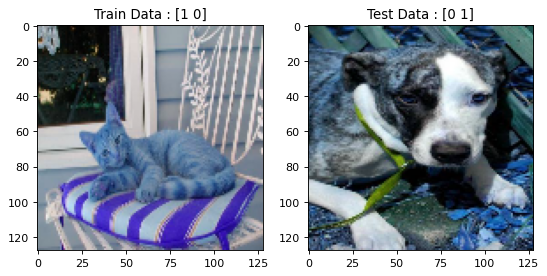

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

index = random.randint(0, len(X_test)-1)

figure(figsize=(8, 6), dpi=80)
plt.subplot(1,2,1)
plt.title(f"Train Data : {Y_train[index]}")
plt.imshow(X_train[index])


plt.subplot(1,2,2)
plt.title(f"Test Data : {Y_test[index]}")
plt.imshow(X_test[index])



plt.show()

 #၁ လက်မမှာ pixel ၈၀ ခု သုံးမယ် ဆိုတဲ့အဓိပ္ပါယ်

# MLP model training

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Rescaling

In [16]:
mlp_model = Sequential([
    Rescaling(1./255, input_shape=(img_width,img_height, 3)),
    Flatten(),
    Dense(67, activation='relu'),
    Dense(2, activation='sigmoid')
])

mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # binary_crossentropy for binary classification
                  metrics=['accuracy'])
mlp_model.summary()

C:\Users\Myint Myat Thu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 67)                  │       3,293,251 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,293,387 (12.56 MB)

 Trainable params: 3,293,387 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
mlp_history = mlp_model.fit(X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4747 - loss: 8.8072 - val_accuracy: 0.4867 - val_loss: 1.0000
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5067 - loss: 1.4901 - val_accuracy: 0.5667 - val_loss: 0.6913
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5147 - loss: 1.0776 - val_accuracy: 0.5200 - val_loss: 0.8575
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5800 - loss: 0.7778 - val_accuracy: 0.5733 - val_loss: 0.7695
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6107 - loss: 0.6719 - val_accuracy: 0.5800 - val_loss: 0.7632
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6507 - loss: 0.6015 - val_accuracy: 0.5133 - val_loss: 0.9292
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5787 - loss: 0.7517 - val_accuracy: 0.5467 - val_loss: 0.7034
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6573 - loss: 0.6496 - val_accuracy: 0.5000 - v

In [18]:

print("--- Evaluating MLP on Test Data ---")
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, Y_test)
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}")

--- Evaluating MLP on Test Data ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5467 - loss: 0.9725
MLP Test Accuracy: 0.5467


# CNN model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [24]:
img_width

128

In [26]:
model = Sequential([
    #Input Layer: Rescale pixel values from [0, 255] to [0, 1]
    Rescaling(1./255, input_shape=(img_width, img_height, 3)), #3 → number of channels in the image

    # Convolution blocks
    Conv2D(32, (3,3), activation = 'relu'),#32 = number of filters/kernels(learnable feature detectors)
    #(3, 3) = Filter size(3 x 3 pixels window)
    #relu = apply relu to introduce non_linearity
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128,activation='relu'),

    Dense(2,activation='sigmoid')
])

🔹 CNN Layer Design Guidelines (မြန်မာ)
1️⃣ Conv2D Layer

ဘယ်အချိန်သုံးမလဲ:

Image dataset ရှိပြီး feature (edges, textures, shapes) ကို detect လုပ်ချင်တဲ့အခါ

Spatial information (pixel arrangement) ကို သိမ်းချင်တဲ့အခါ

How many Conv2D layers:

Small dataset (128x128, binary class) → 2–3 layers

Medium dataset (224x224, 5–10 classes) → 3–4 layers

Large dataset (ImageNet, 1000 classes) → 10+ layers

Filter နည်း/မည်:

First layer → 32 filters

Second layer → 64 filters

Third layer → 128 filters

Later layers → 256, 512 (if dataset big/complex)

Rule of thumb: Layer တက်လာတိုင်း filters double လုပ် → simple → complex feature learning

2️⃣ MaxPooling2D Layer

ဘယ်အချိန်သုံးမလဲ:

Conv2D နောက်မှာ 1–2 layers

Image size ကို လျော့ချပြီး computation လျော့ချချင်တဲ့အခါ

Small shift (slightly moved object) မှာ robust ဖြစ်စေချင်တဲ့အခါ

Pool size: (2,2) → width & height halve လုပ်
# Conv2D → MaxPooling → Conv2D → MaxPooling → Conv2D → MaxPooling → Flatten → Dense


In [28]:
model.compile(optimizer = 'adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(
    X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs = EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.5107 - loss: 0.8227 - val_accuracy: 0.5000 - val_loss: 0.7078
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.4960 - loss: 0.6972 - val_accuracy: 0.5133 - val_loss: 0.6922
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.5600 - loss: 0.6885 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.6027 - loss: 0.6666 - val_accuracy: 0.5733 - val_loss: 0.6685
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.7067 - loss: 0.5982 - val_accuracy: 0.6000 - val_loss: 0.6489
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.7480 - loss: 0.5399 - val_accuracy: 0.6000 - val_loss: 0.7132
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.7667 - loss: 0.4809 - val_accuracy: 0.6133 - val_loss: 0.8272
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.7987 - loss: 0.4166 - val_accuracy: 0.

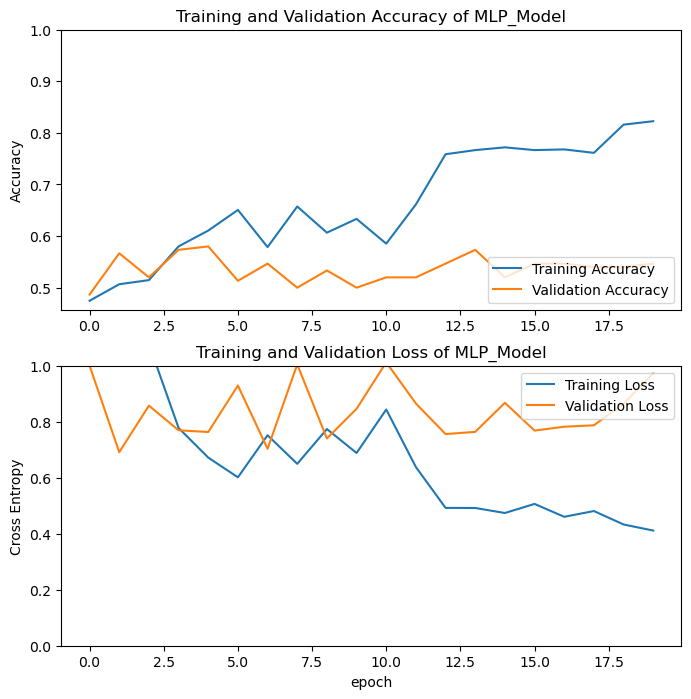

In [31]:
import matplotlib.pyplot as plt
acc = mlp_history.history['accuracy']
val_acc = mlp_history.history['val_accuracy']

loss = mlp_history.history['loss']
val_loss = mlp_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy of MLP_Model')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss of MLP_Model')
plt.xlabel('epoch')
plt.show()

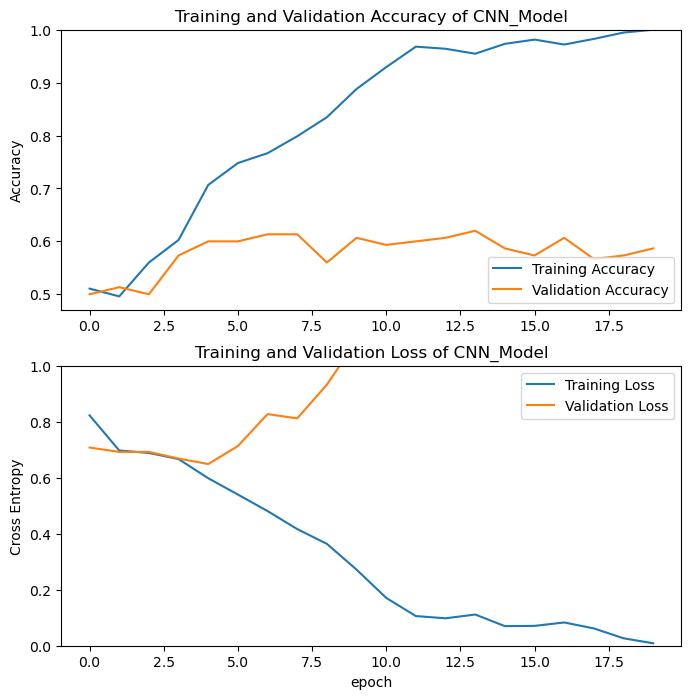

In [32]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy of CNN_Model')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss of CNN_Model')
plt.xlabel('epoch')
plt.show()